In [1]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_utils import load_data, split_dataset
from processing import extract_by_vars, extract_by_means

np.random.seed(17000)
#sns.set_style("whitegrid")

In [2]:
data = load_data(mode="coad", log=True)
df = data["coad"]

In [3]:
#df[df < -20] = -20

In [4]:
X = df.drop(["COVAR_N_status", "COVAR_M"], axis=1)

In [5]:
rows = 32
cols = 32

target ="COVAR_N_status"
diffs = abs(X[df[target] == 1].var() - X.var())
sorted_diffs = diffs.sort_values(ascending=False).index.to_numpy()
columns = sorted_diffs[:rows * cols]

X = X[columns]
X = X.to_numpy()

/var/folders/qp/zqmm5rv50hx52zw0dnvpny2w0000gn/T/ipykernel_57759/3652904913.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  diffs = abs(X[df[target] == 1].var() - X.var())


In [6]:
X.shape

(474, 1024)

In [7]:
from IGTD_functions import *

In [8]:
norm_d = min_max_transform(X)
norm_d = X

In [9]:
fea_dist_method = 'Euclidean'
image_dist_method = 'Euclidean'
ranking_feature, corr = generate_feature_distance_ranking(data=norm_d, method=fea_dist_method)
coordinate, ranking_image = generate_matrix_distance_ranking(num_r=rows, num_c=cols,
                                                                 method=image_dist_method)

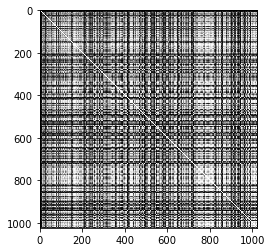

In [10]:
plt.imshow(np.max(ranking_feature) - ranking_feature, cmap='gray', interpolation='nearest')

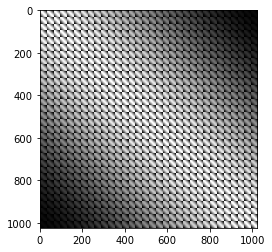

In [11]:
plt.imshow(np.max(ranking_image) - ranking_image, cmap='gray', interpolation='nearest')

In [12]:
index, err, time = IGTD(source=ranking_feature, target=ranking_image, save_folder=None, max_step=1500, err_measure='squared')

Step 0 err: 2.3424321400957496e+16
Step 1 err: 2.3335931462033336e+16
Step 2 err: 2.3305567726434544e+16
Step 3 err: 2.3275073501146864e+16
Step 4 err: 2.323968324714913e+16
Step 5 err: 2.321536827790155e+16
Step 6 err: 2.319197556271415e+16
Step 7 err: 2.317372004179091e+16
Step 8 err: 2.3098474769763628e+16
Step 9 err: 2.3082639644701344e+16
Step 10 err: 2.3045178111899056e+16
Step 11 err: 2.2969421271330516e+16
Step 12 err: 2.294576346004556e+16
Step 13 err: 2.2898411087731624e+16
Step 14 err: 2.2866703786838596e+16
Step 15 err: 2.2818303239420936e+16
Step 16 err: 2.2752597477919676e+16
Step 17 err: 2.2715355689168176e+16
Step 18 err: 2.264249584828708e+16
Step 19 err: 2.2602891460680744e+16
Step 20 err: 2.254527529457948e+16
Step 21 err: 2.2492817074858236e+16
Step 22 err: 2.246200029213227e+16
Step 23 err: 2.243118122244345e+16
Step 24 err: 2.240512780630369e+16
Step 25 err: 2.2388454989127628e+16
Step 26 err: 2.234249628089096e+16
Step 27 err: 2.233361408984837e+16
Step 28 err: 2

Step 227 err: 1.6766221900463236e+16
Step 228 err: 1.6737014292238444e+16
Step 229 err: 1.6696631143637638e+16
Step 230 err: 1.666851269748068e+16
Step 231 err: 1.6622826274808866e+16
Step 232 err: 1.6574372684834504e+16
Step 233 err: 1.6555319013332982e+16
Step 234 err: 1.6543369455037434e+16
Step 235 err: 1.6497776443030608e+16
Step 236 err: 1.6484702306143436e+16
Step 237 err: 1.6471119992099734e+16
Step 238 err: 1.6459611422203746e+16
Step 239 err: 1.6425418296702762e+16
Step 240 err: 1.639801557322537e+16
Step 241 err: 1.6351295837581238e+16
Step 242 err: 1.6324306251574078e+16
Step 243 err: 1.628059131473108e+16
Step 244 err: 1.6244581730537756e+16
Step 245 err: 1.6219504610217624e+16
Step 246 err: 1.6194569111566568e+16
Step 247 err: 1.615257024653894e+16
Step 248 err: 1.6125123345097632e+16
Step 249 err: 1.6099961567971004e+16
Step 250 err: 1.6068310557755044e+16
Step 251 err: 1.6035060698929484e+16
Step 252 err: 1.6015939754720114e+16
Step 253 err: 1.5986716932692998e+16
Step 

Step 451 err: 1.205038619784712e+16
Step 452 err: 1.2034178773100978e+16
Step 453 err: 1.2026568017897726e+16
Step 454 err: 1.2019683190035668e+16
Step 455 err: 1.2010945820116838e+16
Step 456 err: 1.2002579971239486e+16
Step 457 err: 1.199394393044213e+16
Step 458 err: 1.1976536130831542e+16
Step 459 err: 1.1956934518719678e+16
Step 460 err: 1.1935685571182836e+16
Step 461 err: 1.192394477844553e+16
Step 462 err: 1.18977190947689e+16
Step 463 err: 1.1875549688358868e+16
Step 464 err: 1.1862207022860196e+16
Step 465 err: 1.1841265051071738e+16
Step 466 err: 1.1835276194885454e+16
Step 467 err: 1.1829620650777116e+16
Step 468 err: 1.1819170501512312e+16
Step 469 err: 1.1788442353899068e+16
Step 470 err: 1.1781980891212162e+16
Step 471 err: 1.1765302767458498e+16
Step 472 err: 1.1754620377621056e+16
Step 473 err: 1.1748561515980166e+16
Step 474 err: 1.1740524216901082e+16
Step 475 err: 1.1719332508426412e+16
Step 476 err: 1.1700836614331204e+16
Step 477 err: 1.1690114007205444e+16
Step 4

Step 679 err: 9743639245553910.0
Step 680 err: 9741411894137100.0
Step 681 err: 9740687362563776.0
Step 682 err: 9733903575405194.0
Step 683 err: 9729362964321194.0
Step 684 err: 9723445450941614.0
Step 685 err: 9719602532532976.0
Step 686 err: 9712752790459198.0
Step 687 err: 9704653368439948.0
Step 688 err: 9694333546886434.0
Step 689 err: 9686953325806534.0
Step 690 err: 9683087558800250.0
Step 691 err: 9678418653179204.0
Step 692 err: 9668802296080388.0
Step 693 err: 9661968914469972.0
Step 694 err: 9646143513129448.0
Step 695 err: 9634844537986426.0
Step 696 err: 9629723400776612.0
Step 697 err: 9623113287028520.0
Step 698 err: 9618836743446512.0
Step 699 err: 9607166997270090.0
Step 700 err: 9603873204015138.0
Step 701 err: 9595547980925202.0
Step 702 err: 9585891472837468.0
Step 703 err: 9575822268992114.0
Step 704 err: 9565443517268808.0
Step 705 err: 9564044279985262.0
Step 706 err: 9562943007257112.0
Step 707 err: 9553434700778532.0
Step 708 err: 9550634187053552.0
Step 709 e

Step 928 err: 8547662105416209.0
Step 929 err: 8545520373895777.0
Step 930 err: 8543398877258437.0
Step 931 err: 8541039895612185.0
Step 932 err: 8538427383241489.0
Step 933 err: 8534505000014253.0
Step 934 err: 8529106511457639.0
Step 935 err: 8526922430100071.0
Step 936 err: 8525696424138941.0
Step 937 err: 8520178971144625.0
Step 938 err: 8517934083544981.0
Step 939 err: 8513755645635701.0
Step 940 err: 8511004707246439.0
Step 941 err: 8505956118440953.0
Step 942 err: 8499332170959263.0
Step 943 err: 8493935634548817.0
Step 944 err: 8491118771784241.0
Step 945 err: 8487038965766109.0
Step 946 err: 8484037022930439.0
Step 947 err: 8482429568620567.0
Step 948 err: 8481748367858785.0
Step 949 err: 8479416167571675.0
Step 950 err: 8474644571062281.0
Step 951 err: 8472659228570483.0
Step 952 err: 8469044115547355.0
Step 953 err: 8467139135916261.0
Step 954 err: 8458738153279783.0
Step 955 err: 8456329016052363.0
Step 956 err: 8451944271473037.0
Step 957 err: 8451342694848677.0
Step 958 e

Step 1172 err: 7909825229810372.0
Step 1173 err: 7907794707098566.0
Step 1174 err: 7906693455189128.0
Step 1175 err: 7902426099882898.0
Step 1176 err: 7901018654772694.0
Step 1177 err: 7898855745968653.0
Step 1178 err: 7895959364087239.0
Step 1179 err: 7894733728706243.0
Step 1180 err: 7892352397833721.0
Step 1181 err: 7891654856596577.0
Step 1182 err: 7890535956329627.0
Step 1183 err: 7889483242018573.0
Step 1184 err: 7886312103993889.0
Step 1185 err: 7881051603805883.0
Step 1186 err: 7880103637085735.0
Step 1187 err: 7879375117847633.0
Step 1188 err: 7876608427467901.0
Step 1189 err: 7876368993318337.0
Step 1190 err: 7874943874898137.0
Step 1191 err: 7873835251347345.0
Step 1192 err: 7873236249519229.0
Step 1193 err: 7871933999347742.0
Step 1194 err: 7870681454654552.0
Step 1195 err: 7869036906751454.0
Step 1196 err: 7867103168782644.0
Step 1197 err: 7866670778349310.0
Step 1198 err: 7865238270722666.0
Step 1199 err: 7861650251264432.0
Step 1200 err: 7858681230376924.0
Step 1201 err:

Step 1413 err: 7623522778963513.0
Step 1414 err: 7623206956861879.0
Step 1415 err: 7622802126491331.0
Step 1416 err: 7621835652926243.0
Step 1417 err: 7621425058808283.0
Step 1418 err: 7621369824144913.0
Step 1419 err: 7620426924782375.0
Step 1420 err: 7620315967378635.0
Step 1421 err: 7620161442556414.0
Step 1422 err: 7619273806568264.0
Step 1423 err: 7619039278795770.0
Step 1424 err: 7618381495606014.0
Step 1425 err: 7618229918148300.0
Step 1426 err: 7617977904596620.0
Step 1427 err: 7617764137681208.0
Step 1428 err: 7617392106789590.0
Step 1429 err: 7616139019739210.0
Step 1430 err: 7615705366218934.0
Step 1431 err: 7615591228481790.0
Step 1432 err: 7614739508268334.0
Step 1433 err: 7614044087313060.0
Step 1434 err: 7613551777373972.0
Step 1435 err: 7612959338612632.0
Step 1436 err: 7611851196676556.0
Step 1437 err: 7611315766853254.0
Step 1438 err: 7610813683911664.0
Step 1439 err: 7610127257785836.0
Step 1440 err: 7608469446420008.0
Step 1441 err: 7607740582909948.0
Step 1442 err:

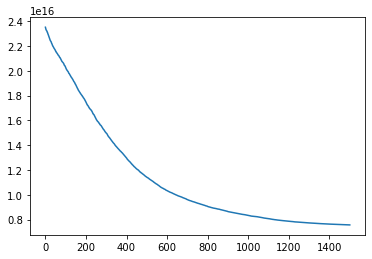

In [13]:
plt.plot(range(len(err)), err)

In [14]:
min_id = np.argmin(err)
ranking_feature_random = ranking_feature[index[min_id, :], :]
ranking_feature_random = ranking_feature_random[:, index[min_id, :]]

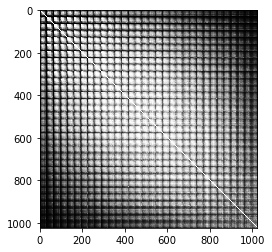

In [15]:
plt.imshow(np.max(ranking_feature_random) - ranking_feature_random, cmap='gray',
               interpolation='nearest')

In [16]:
data, samples = generate_image_data(data=norm_d, index=index[min_id, :], num_row=rows, num_column=cols,
        coord=coordinate, image_folder=None)

In [17]:
data

array([[[1.17254231, 2.14919327, 3.61505143, ..., 1.90142871,
         3.95336267, 1.96368809],
        [2.26516579, 1.93818622, 2.63849529, ..., 2.54622761,
         2.54105818, 1.85421132],
        [2.38051167, 1.85333071, 2.68695722, ..., 2.56397793,
         3.33612934, 1.88607319],
        ...,
        [1.77830921, 1.17709223, 1.49351444, ..., 1.04673409,
         3.29561674, 1.54845911],
        [4.38211745, 7.62520433, 4.40285566, ..., 5.1860329 ,
         7.62520433, 4.99524797],
        [5.16749056, 4.51631161, 5.40509399, ..., 4.89224677,
         5.34013193, 5.74781114]],

       [[2.8752665 , 2.85255399, 2.39950342, ..., 2.32032357,
         2.64326591, 2.73593439],
        [3.85945649, 2.11462197, 3.19413635, ..., 2.80507506,
         3.80565883, 2.27651601],
        [2.64538332, 2.60833664, 2.53868758, ..., 2.82569175,
         3.54016322, 2.69136862],
        ...,
        [5.02415747, 5.30252212, 7.62520433, ..., 4.36214921,
         7.62520433, 5.32834785],
        [4.2

In [18]:
assert sorted([int(s) for s in samples]) == [int(s) for s in samples]

In [19]:
class IGTDImages(torch.utils.data.Dataset):
    def __init__(self, image_data, labels):
        super().__init__()
        self.images = torch.from_numpy(image_data).float()
        self.labels = torch.from_numpy(labels).long()
        assert len(self.images) == len(self.labels)
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, i):
        return self.images[i].unsqueeze(0), self.labels[i]

In [20]:
import torch.nn as nn
import torch.nn.functional as F

In [21]:
class SimpleCNN(nn.Module):
    def __init__(self, n_out):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 5, padding="same")
        self.batch1 = nn.LayerNorm((32, 32))
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding="same")
        self.batch2 = nn.LayerNorm((16, 16))
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, 3, padding="same")
        self.batch3 = nn.LayerNorm((8, 8))
        self.pool3 = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(4 * 4 * 64, 128)
        self.drop1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, n_out)
        self.drop2 = nn.Dropout(0.5)
        self.out = nn.Softmax()
    
    def forward(self, x):
        x = self.pool1(self.batch1(F.relu(self.conv1(x))))
        x = self.pool2(self.batch2(F.relu(self.conv2(x))))
        x = self.pool3(self.batch3(F.relu(self.conv3(x))))
        x = self.flatten(x)
        x = F.relu(self.drop1(self.fc1(x)))
        x = self.out(self.drop2(self.fc2(x)))
        return x

In [22]:
target = "COVAR_N_status"
X = np.transpose(data, (2, 0, 1))
y = df[target].to_numpy()
indices = np.arange(len(y))
assert len(X) == len(y)

In [23]:
y.shape

(474,)

In [24]:
from sklearn import model_selection

In [25]:
X_temp, X_val, y_temp, y_val, i_temp, i_val = model_selection.train_test_split(X, y, indices, test_size=0.2, random_state=1739)
X_train, X_test, y_train, y_test, i_train, i_test = model_selection.train_test_split(X_temp, y_temp, i_temp, test_size=0.2, random_state=1739)

In [26]:
train_data = IGTDImages(X_train, y_train)
val_data = IGTDImages(X_val, y_val)
test_data = IGTDImages(X_test, y_test)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=False)

In [27]:
model = SimpleCNN(4)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.05)

In [28]:
epochs = 30
train_losses = []
val_losses = []
for epoch in range(epochs):
    train_loss = 0.0
    val_loss = 0.0
    model.train()
    for i, (image, label) in enumerate(train_loader):
        optimizer.zero_grad()
        out = model(image).squeeze()
        loss = criterion(out, label)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    model.eval()
    with torch.no_grad():
        for i, (image, label) in enumerate(val_loader):
            out = model(image).squeeze()
            loss = criterion(out, label)
            
            val_loss += loss.item()
            
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    print(train_loss, val_loss)

/var/folders/qp/zqmm5rv50hx52zw0dnvpny2w0000gn/T/ipykernel_57759/3493893528.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.out(self.drop2(self.fc2(x)))


1.244032748435673 1.0847658812999725
1.2239457094355632 1.0829404890537262
1.200285673925751 1.0831385652224224
1.2003680255852247 1.0814586977163951
1.2388687886689838 1.0840410590171814
1.194474673584888 1.0821541647116344
1.2227039878305637 1.082547903060913
1.213063657283783 1.0848330060640972
1.1990325082289546 1.0867007970809937
1.1891462065671619 1.0861718356609344
1.21851126692797 1.1070466041564941
1.1848100776735104 1.08038596312205
1.182117215112636 1.0897078613440196
1.1368089765310287 1.108644684155782
1.1086187715593137 1.1428843935330708
1.093014764942621 1.1059797207514446
1.0635510228182141 1.1211075981458027
1.048086006390421 1.0875865717728932
1.0276109027235132 1.0877478818098705
0.997881722293402 1.1115368803342183
0.9964211355698737 1.0732901791731517
1.032771345031889 1.0778715312480927
0.9752254697837328 1.0889444847901661
1.0055697952446185 1.0751413106918335
0.9691544441800368 1.0683477818965912
0.9941290373864927 1.1303659876187642
0.9888026494728891 1.101047

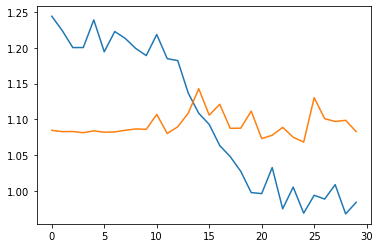

In [29]:
plt.plot(range(epochs), train_losses)
plt.plot(range(epochs), val_losses)

In [30]:
def accuracy(model, *loaders):
    model.eval()
    with torch.no_grad():
        num_correct = 0
        tries = 0
        for loader in loaders:
            for i, (X, y) in enumerate(loader):
                out = model(X).squeeze()
                preds = torch.argmax(out, dim=1)
                num_correct += (preds == y).sum()
                tries += len(y)
        
        accuracy = num_correct / tries 
    return accuracy

In [31]:
accuracy(model, train_loader)

/var/folders/qp/zqmm5rv50hx52zw0dnvpny2w0000gn/T/ipykernel_57759/3493893528.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.out(self.drop2(self.fc2(x)))


tensor(0.9967)

In [32]:
accuracy(model, val_loader)

/var/folders/qp/zqmm5rv50hx52zw0dnvpny2w0000gn/T/ipykernel_57759/3493893528.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.out(self.drop2(self.fc2(x)))


tensor(0.6421)

In [33]:
accuracy(model, test_loader)

/var/folders/qp/zqmm5rv50hx52zw0dnvpny2w0000gn/T/ipykernel_57759/3493893528.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.out(self.drop2(self.fc2(x)))


tensor(0.6316)

In [34]:
accuracy(model, test_loader, val_loader)

/var/folders/qp/zqmm5rv50hx52zw0dnvpny2w0000gn/T/ipykernel_57759/3493893528.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.out(self.drop2(self.fc2(x)))


tensor(0.6374)

In [35]:
from sklearn import linear_model
from sklearn import metrics

In [36]:
X_train_sk = df[columns].loc[i_train]
y_train_sk = df[target].loc[i_train]
X_test_sk = df[columns].loc[i_test]
y_test_sk = df[target].loc[i_test]
X_val_sk = df[columns].loc[i_val]
y_val_sk = df[target].loc[i_val]

In [37]:
X_train.reshape(-1, 32*32)

array([[1.18617199, 2.10429812, 1.88891758, ..., 5.84383119, 5.65731255,
        7.62520433],
       [4.14374024, 2.71261582, 2.52472834, ..., 7.62520433, 5.59862178,
        7.62520433],
       [1.01214146, 2.0328143 , 2.17480084, ..., 7.62520433, 4.82056471,
        5.75310165],
       ...,
       [1.24688273, 2.14783598, 2.27129465, ..., 7.62520433, 5.57970371,
        7.62520433],
       [4.51597623, 4.83134113, 4.18791692, ..., 4.83557939, 5.46298726,
        7.62520433],
       [1.82120179, 2.89241044, 2.84491216, ..., 7.62520433, 7.62520433,
        5.75470786]])

In [38]:
model = linear_model.LogisticRegression(max_iter=1000)
model.fit(X_train.reshape(-1, 32*32), y_train)

LogisticRegression(max_iter=1000)

In [39]:
preds = model.predict(X_val.reshape(-1, 32*32))
metrics.accuracy_score(y_val, preds)

0.6947368421052632

In [40]:
preds = model.predict(X_test.reshape(-1, 32*32))
metrics.accuracy_score(y_test, preds)

0.7368421052631579

1


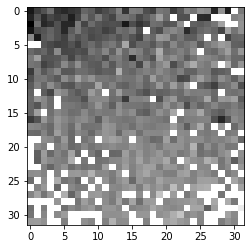

In [41]:
i = 5
plt.imshow(X[i].squeeze(), cmap="gray")
print(y[i].item())

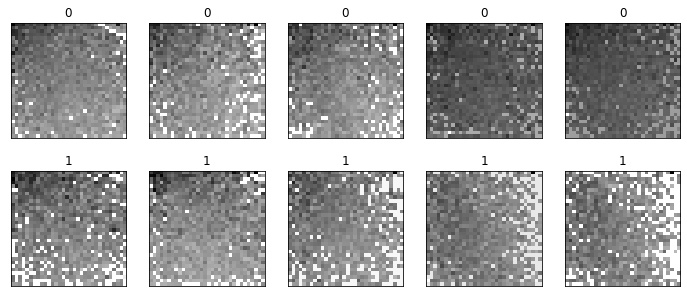

In [48]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(2):
    for j in range(5):
        axes[i, j].imshow(X[i * 5 + j].squeeze(), cmap="gray", )
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        axes[i, j].set_title(y[i].item())